___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [68]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2018,1,1)

In [89]:
tsla = web.DataReader('TSLA', 'morningstar', start, end)
tsla.head()

Close    High     Low    Open    Volume
Symbol Date                                                
TSLA   2017-01-02  213.69  213.69  213.69  213.69         0
       2017-01-03  216.99  220.33  210.96  214.86   5923254
       2017-01-04  226.99  228.00  214.31  214.75  11213471
       2017-01-05  226.75  227.48  221.95  226.42   5911695
       2017-01-06  229.01  230.31  225.45  226.93   5527893

In [116]:
daterange = pd.date_range(start,end); daterange

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

In [ ]:
bmw = web.DataReader('BMW', 'morningstar', start, end)
bmw.head()

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [47]:
tickers = ['BAC','C','GS','JPM','MS','WFC','TSLA']
d={}
for i in range(len(tickers)):   ###### Drop extra 'symbol' column 
    ticker = tickers[i]
    d[ticker]=web.DataReader(ticker, 'morningstar', start, end) 
    d[ticker].reset_index(inplace = True)
    d[ticker].drop('Symbol',axis = 1,inplace = True)

In [48]:
##################################
cols = pd.MultiIndex.from_tuples([("a", "b"), ("a", "c")])
df = pd.DataFrame([[1,2], [3,4]], columns=cols); df

a   
   b  c
0  1  2
1  3  4

In [49]:
d['BAC'].head()

,Date,Close,High,Low,Open,Volume
0,2017-01-02,22.10,22.10,22.100,22.10,0
1,2017-01-03,22.53,22.68,22.200,22.60,99276326
2,2017-01-04,22.95,22.96,22.600,22.72,76846795
3,2017-01-05,22.68,22.93,22.345,22.82,86803797
4,2017-01-06,22.68,22.85,22.560,22.78,66273156


** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [61]:
bank_stocks = pd.concat([d[i] for i in tickers],axis=1,keys = tickers).drop_duplicates()
bank_stocks.head()

BAC                                                 C                \
        Date  Close   High     Low   Open    Volume       Date  Close   High   
0 2017-01-02  22.10  22.10  22.100  22.10         0 2017-01-02  59.43  59.43   
1 2017-01-03  22.53  22.68  22.200  22.60  99276326 2017-01-03  60.59  61.09   
2 2017-01-04  22.95  22.96  22.600  22.72  76846795 2017-01-04  61.41  61.63   
3 2017-01-05  22.68  22.93  22.345  22.82  86803797 2017-01-05  60.34  61.43   
4 2017-01-06  22.68  22.85  22.560  22.78  66273156 2017-01-06  60.55  60.84   

            ...         WFC                                TSLA          \
     Low    ...        High     Low   Open    Volume       Date   Close   
0  59.43    ...     55.1100  55.110  55.11         0 2017-01-02  213.69   
1  59.75    ...     56.3500  55.460  55.67  22063540 2017-01-03  216.99   
2  60.61    ...     56.3071  55.611  56.16  15033648 2017-01-04  226.99   
3  59.91    ...     55.8200  54.475  55.49  18831328 2017-01-05  226.75   
4  60.08    ...     55.5660  54.700  55.26  18714885 2017-01-06  229.01   

                                     
     High     Low    Open    Volume  
0  213.69  213.69  213.69         0  
1  220.33  210.96  214.86   5923254  
2  228.00  214.31  214.75  11213471  
3  227.48  221.95  226.42   5911695  
4  230.31  225.45  226.93   5527893  

[5 rows x 42 columns]

** Set the column name levels (this is filled out for you):**

In [62]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info'] ################# Set column names
bank_stocks.head()

Bank Ticker        BAC                                                 C  \
Stock Info        Date  Close   High     Low   Open    Volume       Date   
0           2017-01-02  22.10  22.10  22.100  22.10         0 2017-01-02   
1           2017-01-03  22.53  22.68  22.200  22.60  99276326 2017-01-03   
2           2017-01-04  22.95  22.96  22.600  22.72  76846795 2017-01-04   
3           2017-01-05  22.68  22.93  22.345  22.82  86803797 2017-01-05   
4           2017-01-06  22.68  22.85  22.560  22.78  66273156 2017-01-06   

Bank Ticker                         ...         WFC                           \
Stock Info   Close   High    Low    ...        High     Low   Open    Volume   
0            59.43  59.43  59.43    ...     55.1100  55.110  55.11         0   
1            60.59  61.09  59.75    ...     56.3500  55.460  55.67  22063540   
2            61.41  61.63  60.61    ...     56.3071  55.611  56.16  15033648   
3            60.34  61.43  59.91    ...     55.8200  54.475  55.49  18831328   
4            60.55  60.84  60.08    ...     55.5660  54.700  55.26  18714885   

Bank Ticker       TSLA                                            
Stock Info        Date   Close    High     Low    Open    Volume  
0           2017-01-02  213.69  213.69  213.69  213.69         0  
1           2017-01-03  216.99  220.33  210.96  214.86   5923254  
2           2017-01-04  226.99  228.00  214.31  214.75  11213471  
3           2017-01-05  226.75  227.48  221.95  226.42   5911695  
4           2017-01-06  229.01  230.31  225.45  226.93   5527893  

[5 rows x 42 columns]

** Check the head of the bank_stocks dataframe.**

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [63]:
#for i in tickers:
#    print(i,bank_stocks[i]['Close'].max())
#or
bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').max()

Bank Ticker
BAC      29.88
C        77.10
GS      261.01
JPM     107.83
MS       53.85
WFC      61.61
TSLA    385.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [65]:
returns = pd.DataFrame()

""


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [80]:
for i in tickers:
    returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
print(returns.head())
plt.plot(returns); plt.legend(tickers)

   BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return  \
0         NaN       NaN        NaN         NaN        NaN         NaN   
1    0.019457  0.019519   0.008854    0.010893   0.018935    0.016150   
2    0.018642  0.013534   0.006458   -0.003668   0.013240    0.000893   
3   -0.011765 -0.017424  -0.007445   -0.009205  -0.009170   -0.015522   
4    0.000000  0.003480   0.014835    0.000116   0.014577   -0.002537   

   TSLA Return  
0          NaN  
1     0.015443  
2     0.046085  
3    -0.001057  
4     0.009967  


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

<IPython.core.display.Javascript object>


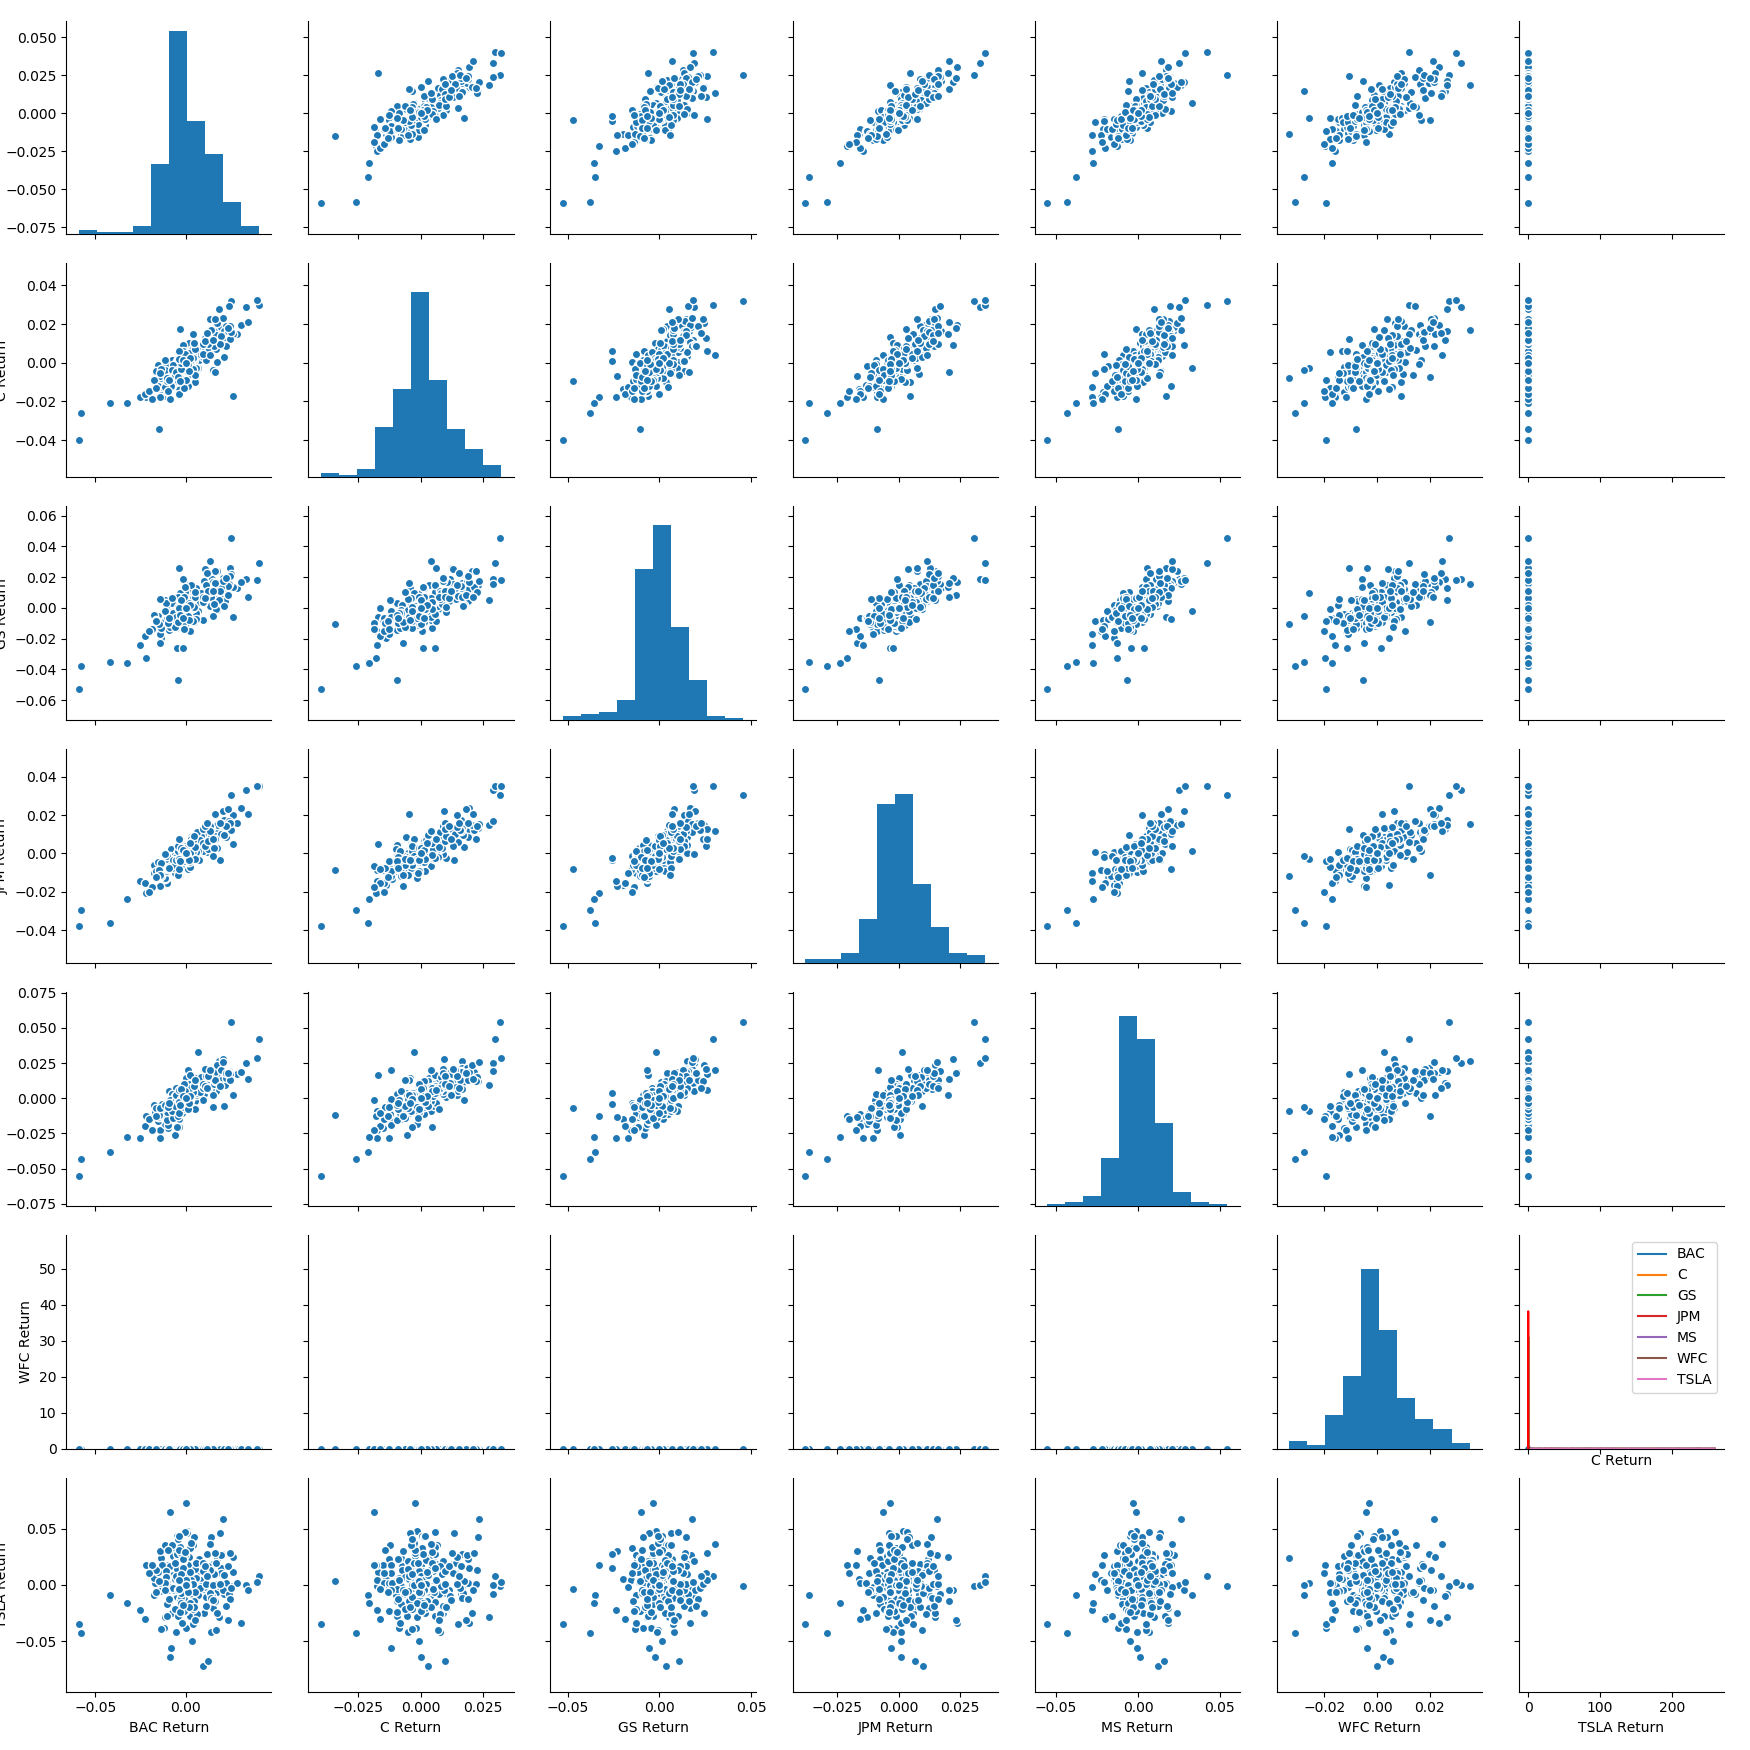

In [71]:
import seaborn as sb
sb.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [72]:
# returns['BAC Return'].argmin()
returns.idxmin()

BAC Return      97
C Return        97
GS Return       97
JPM Return      97
MS Return       97
WFC Return      73
TSLA Return    132
dtype: int64

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [12]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [74]:
returns.std()

BAC Return     0.013272
C Return       0.010936
GS Return      0.012205
JPM Return     0.009999
MS Return      0.012950
WFC Return     0.010982
TSLA Return    0.021878
dtype: float64

In [121]:
returns.loc[1:len(daterange)/3].std()

BAC Return     0.014758
C Return       0.011587
GS Return      0.013318
JPM Return     0.010986
MS Return      0.015092
WFC Return     0.011791
TSLA Return    0.021186
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\mo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


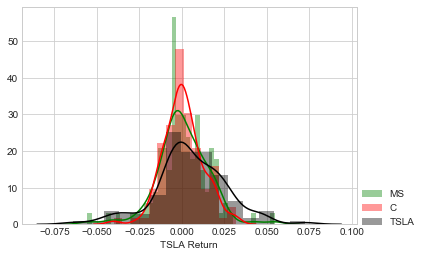

In [148]:
sb.distplot(returns.loc[1:len(daterange)/3]['MS Return'],color = 'green',bins = 40)
sb.distplot(returns.loc[1:len(daterange)/3]['C Return'],color = 'red')
sb.distplot(returns.loc[1:len(daterange)/3]['TSLA Return'],color = 'black')
plt.legend(['MS','C','TSLA'],bbox_to_anchor=[1.2,.2])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
bank_stocks.head()

ModuleNotFoundError: No module named 'plotly'

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

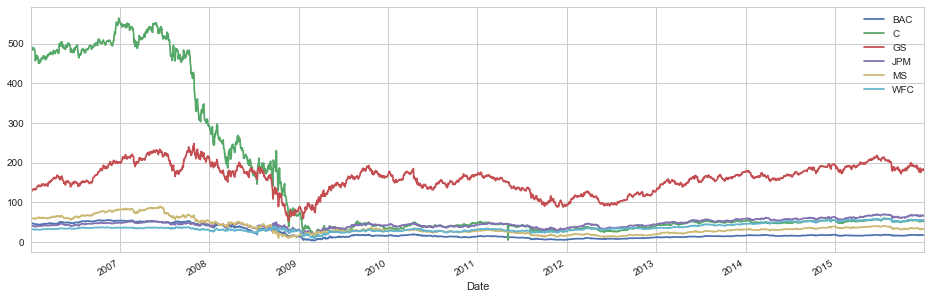

In [22]:
for i in tickers:  
    bank_stocks[i]['Close'].plot(label=i,figsize= (16,5))
# or plt.figure(figsize=(..,.))
plt.legend()

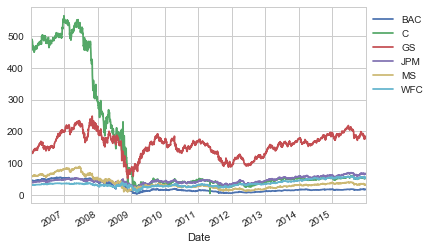

In [23]:
bank_stocks.xs(key = 'Close',axis = 1, level = 'Stock Info').plot()
plt.legend(bbox_to_anchor = (1.2,1))

In [19]:
bank_stocks.xs(key = 'Close',axis = 1, level = 'Stock Info').iplot() ##### INTERACTIVE PLOT

C:\Users\Matthew\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:156: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp



## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

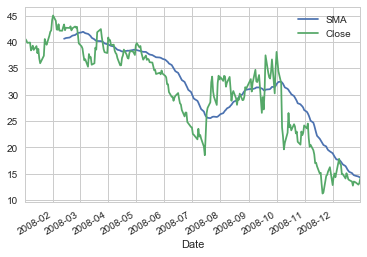

In [20]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(label = 'SMA')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot()
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [18]:
dcorr = bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').corr()
bank_stocks.head()
#dcorr

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

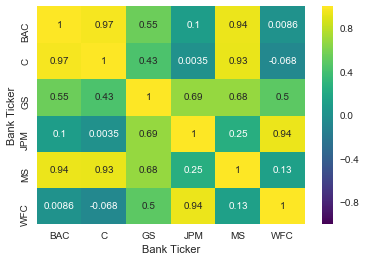

In [21]:
sb.heatmap(dcorr,cmap = 'viridis',annot = True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

C:\Users\mo\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



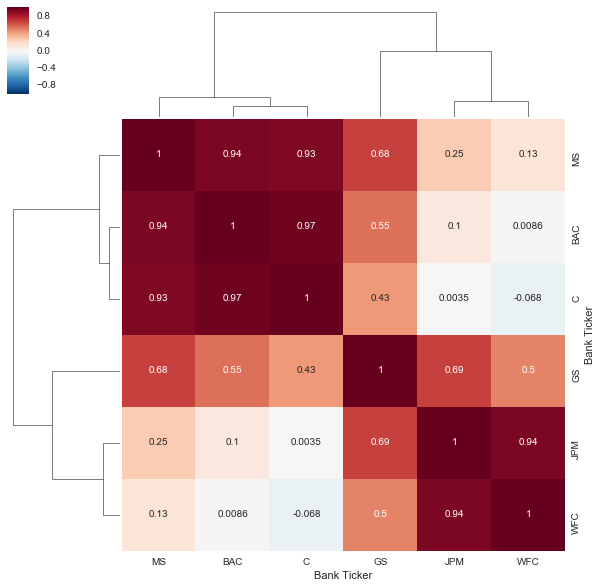

In [22]:
sb.clustermap(dcorr,annot = True)

In [23]:
%matplotlib inline
dcorr.iplot(kind = 'heatmap')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [24]:
MS['Close'].loc['2015-01-1':'2015-12-31'].ta_plot(study = 'sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
import ast
x = u'[ "A","B","C" , " D"]'
x = ast.literal_eval(x)
x

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.